In [1]:
pip install spacy


In [3]:
pip install wordcloud

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('wordnet')
plt.style.use('fivethirtyeight')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
consumer_key='EEvx8aEg2xxSRH48oggjoNWfw'
consumer_secret='a8H4T640lC9UIEF2QBEu6u52KzUPHabRmTFbHXrkVUO4ydTCLm'
access_token='550766618-HXSXFwtGHRbVH3qec34bJZ0dnEIptrIGrhIdE0OK'
access_token_secret='nIy2pf6FcZpc5wqLTfmDB9PSZ8dtLTnn6WjOyFonuEVWl'

In [6]:
auth=tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

In [7]:
num_of_tweets=200
tweets=[]
likes=[]
time=[]
for i in tweepy.Cursor(api.user_timeline,id='JoeBiden',tweet_mode='extended').items(num_of_tweets):
    tweets.append(i.full_text)
    likes.append(i.favorite_count)
    time.append(i.created_at)
        

In [8]:
tweets

["With the expanded Child Tax Credit, we're proving that democracy can deliver for the American people. https://t.co/CElYsejTiH",
 'RT @POTUS: Since I took office six months ago, we’ve gone from 60,000 new jobs per month – to 60,000 every three days.\n\nThat’s the fastest…',
 'Wildfires don’t stop at a county or state line. That’s why we’re working hand-in-hand with state and local leaders to invest in prevention and preparation to fight wildfires. https://t.co/IJYy4Qpi7T',
 'RT @POTUS: With the Delta variant on the rise across the country, it’s more important than ever to get vaccinated. Head to https://t.co/4MY…',
 'Our service members—at home and abroad—are the steel spine of America. https://t.co/djTxn46dxC',
 'RT @POTUS: Yesterday’s Federal court ruling is deeply disappointing. While the court’s order does not now affect current DACA recipients, t…',
 "After a year of hard-fought progress on COVID-19, we can't get complacent now. Let's finish the job together. https://t.co/vATTWcD

In [21]:
df=pd.DataFrame({'tweets':tweets,
                 'likes' :likes,
                 'time'  : time})
df

,tweets,likes,time
0,"With the expanded Child Tax Credit, we're prov...",8828,2021-07-19 22:07:44
1,"RT @POTUS: Since I took office six months ago,...",0,2021-07-19 16:43:53
2,Wildfires don’t stop at a county or state line...,12682,2021-07-18 18:54:11
3,RT @POTUS: With the Delta variant on the rise ...,0,2021-07-18 16:08:51
4,Our service members—at home and abroad—are the...,10518,2021-07-17 17:24:13
...,...,...,...
195,RT @WhiteHouse: President Biden believes every...,0,2021-03-24 00:52:38
196,RT @POTUS: Jill and I are devastated for the l...,0,2021-03-23 17:33:46
197,RT @WhiteHouse: Big news: The Biden-Harris Adm...,0,2021-03-22 21:09:33
198,"RT @POTUS: Under the American Rescue Plan, the...",0,2021-03-22 18:04:25


In [22]:
#function for cleaning the text

def cleantext(text):
    text=re.sub(r'@[A-Za-z0-9]+:?','',text) #removed @mentions
    text=re.sub(r'#','',text) #removed '#' symbols
    text=re.sub(r'RT[\s]+','',text) #removed Rt
    text=re.sub(r'https?:\/\/\S+','',text) #removed hyperlink
    
    return text
#clean text
df['tweets']=df['tweets'].apply(cleantext)


#show text
df

,tweets,likes,time
0,"With the expanded Child Tax Credit, we're prov...",8828,2021-07-19 22:07:44
1,"Since I took office six months ago, we’ve gone...",0,2021-07-19 16:43:53
2,Wildfires don’t stop at a county or state line...,12682,2021-07-18 18:54:11
3,With the Delta variant on the rise across the ...,0,2021-07-18 16:08:51
4,Our service members—at home and abroad—are the...,10518,2021-07-17 17:24:13
...,...,...,...
195,President Biden believes every single American...,0,2021-03-24 00:52:38
196,Jill and I are devastated for the lives that h...,0,2021-03-23 17:33:46
197,Big news: The Biden-Harris Administration set ...,0,2021-03-22 21:09:33
198,"Under the American Rescue Plan, the typical fa...",0,2021-03-22 18:04:25


In [25]:
#Funtion to get Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['tweets'].apply(getSubjectivity)
df['Polarity']=df['tweets'].apply(getPolarity)

#new dataframe
df

,tweets,likes,time,Subjectivity,Polarity
0,"With the expanded Child Tax Credit, we're prov...",8828,2021-07-19 22:07:44,0.000000,0.000000
1,"Since I took office six months ago, we’ve gone...",0,2021-07-19 16:43:53,0.454545,0.136364
2,Wildfires don’t stop at a county or state line...,12682,2021-07-18 18:54:11,0.000000,0.000000
3,With the Delta variant on the rise across the ...,0,2021-07-18 16:08:51,0.750000,0.450000
4,Our service members—at home and abroad—are the...,10518,2021-07-17 17:24:13,0.000000,0.000000
...,...,...,...,...,...
195,President Biden believes every single American...,0,2021-03-24 00:52:38,0.107143,-0.035714
196,Jill and I are devastated for the lives that h...,0,2021-03-23 17:33:46,0.066667,-0.166667
197,Big news: The Biden-Harris Administration set ...,0,2021-03-22 21:09:33,0.277273,0.068182
198,"Under the American Rescue Plan, the typical fa...",0,2021-03-22 18:04:25,0.250000,-0.083333


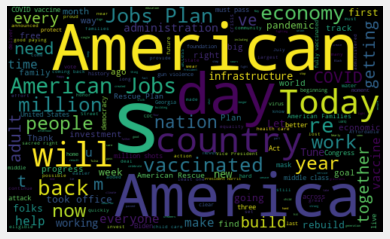

In [26]:
#plotting word cloud
allWords=''.join([twts for twts in df['tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
#check positive, 
def AnalysisCheck(score):
    if score<0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df['Analysis']=df['Polarity'].apply(AnalysisCheck)
df['Analysis'].value_counts()

Positive    110
Neutral      66
Negative     24
Name: Analysis, dtype: int64

In [63]:
df=df.reset_index(drop=True)
df

,tweets,likes,time,Subjectivity,Polarity,Analysis
0,"With the expanded Child Tax Credit, we're prov...",8828,2021-07-19 22:07:44,0.000000,0.000000,Neutral
1,"Since I took office six months ago, we’ve gone...",0,2021-07-19 16:43:53,0.454545,0.136364,Positive
2,Wildfires don’t stop at a county or state line...,12682,2021-07-18 18:54:11,0.000000,0.000000,Neutral
3,With the Delta variant on the rise across the ...,0,2021-07-18 16:08:51,0.750000,0.450000,Positive
4,Our service members—at home and abroad—are the...,10518,2021-07-17 17:24:13,0.000000,0.000000,Neutral
...,...,...,...,...,...,...
195,President Biden believes every single American...,0,2021-03-24 00:52:38,0.107143,-0.035714,Negative
196,Jill and I are devastated for the lives that h...,0,2021-03-23 17:33:46,0.066667,-0.166667,Negative
197,Big news: The Biden-Harris Administration set ...,0,2021-03-22 21:09:33,0.277273,0.068182,Positive
198,"Under the American Rescue Plan, the typical fa...",0,2021-03-22 18:04:25,0.250000,-0.083333,Negative


In [62]:
#mostlikedtweets
mostlike=df.loc[df.likes.nlargest(5).index]
mostlike

,tweets,likes,time,Subjectivity,Polarity,Analysis
147,"Get vaccinated, America.",214632,2021-04-25 21:05:37,0.00000,0.000000,Neutral
158,"Today, every adult is eligible to get a COVID-...",190379,2021-04-19 20:33:25,0.40000,0.300000,Positive
51,"COVID-19 vaccines are free. Get vaccinated, fo...",168146,2021-06-10 17:12:29,0.80000,0.400000,Positive
107,After a year of hard work and so much sacrific...,165112,2021-05-13 20:13:10,0.36627,-0.030556,Negative
99,Help spread the word: From May 24 until July 4...,150515,2021-05-18 15:21:39,0.80000,0.400000,Positive


In [40]:
#print positive tweets
i=1
sorted_df=df.sort_values(by=['Polarity'])
for j in range(0,sorted_df.shape[0]):
    if sorted_df['Analysis'][j]=='Positive':
        print(str(i)+')'+sorted_df['tweets'][j])
        print()
        i+=1
        
         
          
            

1)Since I took office six months ago, we’ve gone from 60,000 new jobs per month – to 60,000 every three days.

That’s the fastest…

2)With the Delta variant on the rise across the country, it’s more important than ever to get vaccinated. Head to 

3)Today is a historic day for our country. Because beginning this morning, nearly all working families started receiving their fir…

4)Thanks for stopping by, Olivia, and for using your voice to urge young people to get vaccinated. If we all do our part and get t…

5)Let’s be clear: we’re going to vigorously challenge attacks on our elections. 

6)Get vaccinated, folks. It’s free, it’s effective, and it’s never been easier or more important.

7)Let me be clear: capitalism without competition isn’t capitalism. It’s exploitation.

8)On this day last year during the economic crisis, we announced we weren’t just going back to the way things were—we were going to build back better. 

Our work continues strengthening the middle class, ensuring ever

In [37]:
#print negative tweets
i=1
sorted_df=df.sort_values(by=['Polarity'])
for j in range(0,sorted_df.shape[0]):
    if sorted_df['Analysis'][j]=='Negative':
        print(str(i)+')'+sorted_df['tweets'][j])
        print()
        i+=1
        

1)Yesterday’s Federal court ruling is deeply disappointing. While the court’s order does not now affect current DACA recipients, t…
2)Together, we are going to build an economy that rewards work—not just wealth. An economy that works for the backbone of this country: the people who get up every single day to work hard to provide for their families, who are just looking for a little bit of breathing room.
3)Today we passed a grim milestone: 600,000 lives lost from COVID-19. My heart goes out to all those who’ve lost a loved one. I kn…
4)The pandemic exposed just how badly we need to invest in the foundation of our country, and in the working people of our country. That's why we proposed the American Jobs Plan—we need to make generational investments today to succeed tomorrow.
5)Today, I’m announcing that the United States will donate half a billion new Pfizer vaccines to 92 low- and lower middle-income c…
6)Unemployment claims are down 50% and 64% of adults are vaccinated since I took o

In [39]:
#print neutral tweets
i=1
sorted_df=df.sort_values(by=['Polarity'])
for j in range(0,sorted_df.shape[0]):
    if sorted_df['Analysis'][j]=='Neutral':
        print(str(i)+')'+sorted_df['tweets'][j])
        print()
        i+=1

1)With the expanded Child Tax Credit, we're proving that democracy can deliver for the American people. 

2)Wildfires don’t stop at a county or state line. That’s why we’re working hand-in-hand with state and local leaders to invest in prevention and preparation to fight wildfires. 

3)Our service members—at home and abroad—are the steel spine of America. 

4)After a year of hard-fought progress on COVID-19, we can't get complacent now. Let's finish the job together. 

5)The “big lie” is just that—a big lie. 

6)America is coming back—together. 

7)Help us mark our independence from this virus—get vaccinated.

8)We, the people, are coming back together. 

9)It took a herculean effort across the globe—including the ingenuity of scientists, building on decades of research—to develop a vaccine. As a result, deaths from COVID-19 are plummeting. Our economy is rebounding. And millions of Americans are getting back to living their lives. 

10)This bipartisan agreement represents the largest 

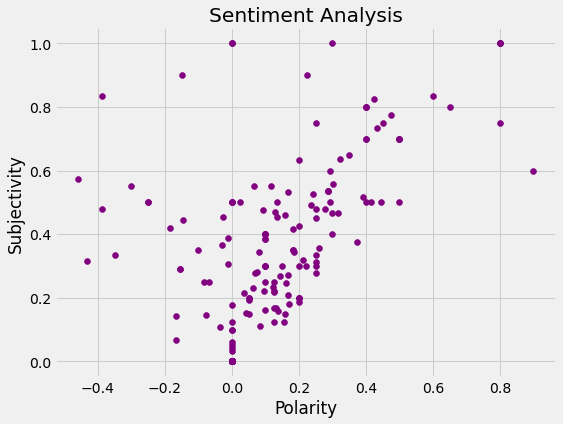

In [42]:
#plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='purple')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [51]:
#percentage of positive tweets
positive_t=df[df.Analysis=='Positive']
positive_t=positive_t['tweets']
round((positive_t.shape[0]/df.shape[0])*100,1)


55.0

In [52]:
#percentage of negative tweets
negative_t=df[df.Analysis=='Negative']
negative_t=negative_t['tweets']
round((negative_t.shape[0]/df.shape[0])*100,1)

12.0

In [55]:
#percentage of neutral tweets
neutral_t=df[df.Analysis=='Neutral']
neutral_t=neutral_t['tweets']
round((neutral_t.shape[0]/df.shape[0])*100,1)

33.0

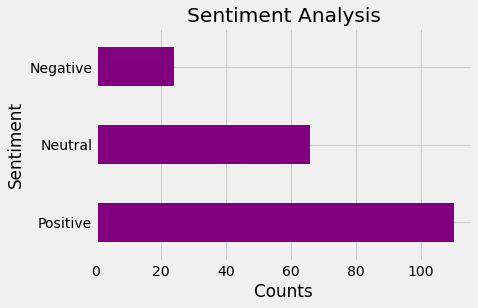

In [61]:
# analysis count
df['Analysis'].value_counts()

#visualizing counts
plt.title('Sentiment Analysis')
plt.xlabel('Counts')
plt.ylabel('Sentiment')
df['Analysis'].value_counts().plot(kind='barh',color='purple')
plt.show()